# TechTeam+DDS Workshop: Exploratory Data Analysis

## Step 1: Importing necessary libraries

Before we can start our analysis, there are a few libraries we need to install. Libraries in Python can be thought of as other Python code containing functions and objects that can be conveniently used in your program to do different things. In our case, we want to install the following three libraries:

1. [Pandas](https://pandas.pydata.org/): Pandas is a library commonly used in data manipulation and data analysis. It provides data structures, most notably including "DataFrames", which provide an efficient and intuitive way of storing, processing, and analyzing datasets with its numerous built-in functions. 

2. [NumPy](https://numpy.org/): NumPy is a general-purpose library for calculating with arrays in multiple dimensions with its N-dimensional array object. It also serves as the base of several other data science libraries, including Scipy.

3. [Matplotlib](https://matplotlib.org/stable/): Matplotlib is a comprehensive plotty library for Python based on NumPy, which has the ability to make a wide variety of static, animated, and even interactive visualizations in Python.

4. [Seaborn](https://seaborn.pydata.org/): Seaborn is a plotting library based on Matplotlib that has an assortment of easy-to-use functions that can be used to easily generate histograms, scatterplots, and other insightful 2D visualizations from data with more aesthetic customizability.

5. [Scipy](https://scipy.org/): Scipy is library of functions for various broadly-applicable statistical algorithms, and is particularly compatable with NumPy and Pandas.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sci

C:\Users\basic\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\basic\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.4' currently installed).
  from pandas.core import (


## Step 2: Loading, inspecting, and pre-processing the data:

Now it's time to load our data. Comma-Seperated Values (.csv) format files provide a great way to load data into Python and save it in plain text. Each line of a .csv file can be seen as a single row of data on a table. Let's load the data into a DataFrame using the Pandas function `pd.read_csv()`:

In [2]:
# Load "dataset.csv"'s data into a dataframe called "traffic_df"
traffic_df = pd.read_csv("dataset.csv")

Great! Now the file is loaded neatly into a DataFrame we can access in Python. Let's take a peek at what kind of data we have with `pd.DataFrame.head()`:

In [3]:
#Show the first 5 rows of our data:
traffic_df.head(5)

,City,Vehicle Type,Weather,Economic Condition,Day Of Week,Hour Of Day,Speed,Is Peak Hour,Random Event Occurred,Energy Consumption,Traffic Density
0,SolarisVille,Drone,Snowy,Stable,0,20,29.4268,0,0,14.7134,0.5241
1,AquaCity,Flying Car,Solar Flare,Recession,3,2,118.8000,0,0,143.5682,0.3208
2,Neuroburg,Autonomous Vehicle,Solar Flare,Recession,3,16,100.3904,0,0,91.2640,0.0415
3,Ecoopolis,Drone,Clear,Booming,4,8,76.8000,1,0,46.0753,0.1811
4,AquaCity,Autonomous Vehicle,Solar Flare,Stable,6,16,45.2176,0,0,40.1934,0.4544


Looks like the data was added nice and cleanly. Since there aren't too many columns, we can see all of our variables within the head. However, for datasets with 100s of columns, we can see all of our columns by accessing `pd.DataFrame.columns`:

In [4]:
traffic_columns = traffic_df.columns
print(traffic_columns)

Index(['City', 'Vehicle Type', 'Weather', 'Economic Condition', 'Day Of Week',
       'Hour Of Day', 'Speed', 'Is Peak Hour', 'Random Event Occurred',
       'Energy Consumption', 'Traffic Density'],
      dtype='object')


Furthermore, we can see what kind of data types each of our columns take with `pd.DataFrame.dtypes`:

In [5]:
column_dtypes = traffic_df.dtypes
print(column_dtypes)

City                      object
Vehicle Type              object
Weather                   object
Economic Condition        object
Day Of Week                int64
Hour Of Day                int64
Speed                    float64
Is Peak Hour               int64
Random Event Occurred      int64
Energy Consumption       float64
Traffic Density          float64
dtype: object


Interesting. Most of the datatypes make sense for what the column corresponds to (City as a object/category, speed as a float). However, an integer doesn't seem like the best way to express "Day of Week". Let's format into a categorical variable (string) using `pd.Series.replace()`, so it'll be easier to read and express on plots later on:

In [6]:
day_of_week_dict = {
    0:"Sunday",
    1:"Monday",
    2:"Tuesday",
    3:"Wednesday",
    4:"Thursday",
    5:"Friday",
    6:"Saturday"
}

#Replace the values in "Day of Week" according to our dictionary. 
#Inplace=True means the line directly modifies the dataframe
traffic_df["Day Of Week"].replace(day_of_week_dict, inplace=True)
traffic_df["Day Of Week"]

C:\Users\basic\AppData\Local\Temp\ipykernel_42604\2937921271.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  traffic_df["Day Of Week"].replace(day_of_week_dict, inplace=True)


0             Sunday
1          Wednesday
2          Wednesday
3           Thursday
4           Saturday
             ...    
1219562    Wednesday
1219563     Saturday
1219564       Monday
1219565       Monday
1219566     Saturday
Name: Day Of Week, Length: 1219567, dtype: object

Now let's get an idea of the size of our DataFrame with `pd.DataFrame.shape`:

In [7]:
traffic_df.shape

(1219567, 11)

Wow, over a million rows! It would be a good idea to check if there are any rows with missing entries for certian columns. After all, we've only seen the first five rows!

In [8]:
#Apply the binary function "isna()" to each entry of each column, then take the sum for each column
traffic_df.isna().sum()

City                     0
Vehicle Type             0
Weather                  0
Economic Condition       0
Day Of Week              0
Hour Of Day              0
Speed                    0
Is Peak Hour             0
Random Event Occurred    0
Energy Consumption       0
Traffic Density          0
dtype: int64

Looks like we got lucky! The only pre-processing we needed to do was to fix the Day of Week column, and none of the columns have empty rows. However, in the real world, it's important to thoroughly check your data for completeness, proper formatting, and pre-process your data if needed (this is almost always the case).

## Step 3: Univariate Analysis

This is the first step in understanding our data. As the name suggests, we will be analyzing each of our variables one at a time. A combination of statistical measures and plots can help us gain valuable insights into our variables. Univariate analysis usually involves a combination of quantitative analysis through statistical metrics and qualitative analysis through visualizations and charts.

### Univariate Analysis of Categorical Variables

A categorical variable is a variable that can take one of a fixed, countable number of values. This can often be thought of as your "qualitative" data. These typically fall into two types:

1. Nominal: Nominal variable have no order in their values. For example, for the "City" column in our data, the values have no intrinsic order. They are simply different categories.

2. Ordinal: Ordinal variables are those with a clear ordering. For example, "Economic Condition" follows an intrinsic order (the order of an economic cycle).

We can use `pd.Series.describe()` to get simple quantitative metrics for categorical variables:

In [9]:
traffic_df["Weather"].describe()

count         1219567
unique              5
top       Solar Flare
freq           244237
Name: Weather, dtype: object

For example, we see the most frequently occuring value for Weather is "Solar Flare" (somewhat concerning if we have cars flying through the air) occuring in ~244k rows, and there are 5 different categories of Weather.

We can check the county of each category in Weather with `pd.Series.value_counts()`:

In [10]:
traffic_df["Weather"].value_counts()

Weather
Solar Flare              244237
Snowy                    244195
Electromagnetic Storm    243857
Clear                    243650
Rainy                    243628
Name: count, dtype: int64

Another common method of analyzing categorical data visually is by plotting the number of occurrences of each category in the data. That is, the number of rows with each category for a given column. Lets look at vehicle type, a nominal categorical variable:

<Axes: xlabel='Vehicle Type', ylabel='count'>

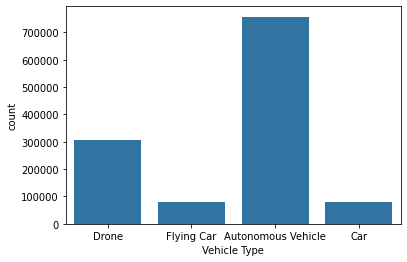

In [11]:
#Generate a plot of the number of occurrences of each Vehicle Type in our DataFrame 
sns.countplot(x="Vehicle Type", data=traffic_df)

For the sake of visualization, it may be more convenient to show the percentage of rows corresponding to each category within the column:

<Axes: xlabel='Vehicle Type', ylabel='percent'>

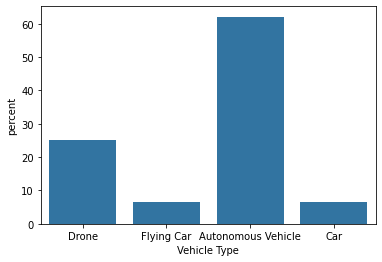

In [12]:
#Generate the same plot, but with percentage
sns.countplot(x="Vehicle Type", data=traffic_df, stat='percent')

One potential insight from this visualization is that data for autonomous vehicles make up a majority (~60%) of the data in the dataset. Assuming the data was collected from a random sample of vehicles, this would tell us that autonomous vehicles make up a large share of the road accross our various cities. Hence, it's important to know how the data was collected in order to draw applicable insights from it.

Now, let's look at an ordinal categorical variable:

<Axes: xlabel='Economic Condition', ylabel='count'>

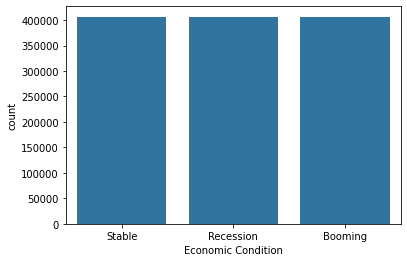

In [13]:
sns.countplot(x="Economic Condition", data=traffic_df)

It appears that there are exactly 400k rows for each economic condition. With such an equal distribution, it's likely the data was explicitly collected or pre-processed in such a way that this would occur. Often times, simple univariate analyses of unfamiliar datasets can help suggest how the data may have been collected or curated.

**Take five minutes** to analyze the categorical variables with these quantitative and qualitative techniques. Can you draw any further insights into what the data might suggest or how it may have been curated?

In [14]:
#Use the following space to experiment. Add new cells below if you need to!



























### Univariate Analysis of Numerical Data

A numerical variable is a one that takes a numeric value with a logical order. This is your "quantitative" data. These typically fall into two types:

1. Discrete: Discrete variables are those that only take whole numerical values. In our dataset, "Hour of Day" acts as a discrete variable, although it would usually be represented otherwise (such as in HH:MM format). A better example would be "Number of Random Events on Tuesdays", which is a feature we could engineer ourselves using "Random Event Occurred".

2. Continuous: Continuous variables are those that take values on the real numbers. These are often the most intuative. For example, "Speed" and "Energy Consumption" are two continuous variables.

We can also use `pd.Series.describe()` to get simple quantitative metrics for numerical variables, as Pandas will know which metrics to generate if the datatype is correct for the variable:

In [15]:
traffic_df["Speed"].describe()

count    1.219567e+06
mean     5.994476e+01
std      2.663203e+01
min      6.693400e+00
25%      3.753310e+01
50%      5.847110e+01
75%      8.053455e+01
max      1.630886e+02
Name: Speed, dtype: float64

If we want a better intuition of the quartiles and distribution of our variable, we can use `sns.boxplot()` to generate a box plot (also called a box-and-whisker plot):

<Axes: xlabel='Speed'>

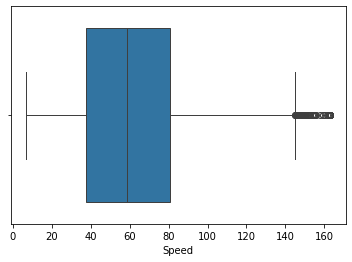

In [16]:
sns.boxplot(x="Speed", data=traffic_df)

Other basic statistical metrics such as median and mode can be useful in analyzing discrete variables in particular.

With continuous variables, there are also other quantitative metrics such as skewness and kurtosis that can tell us about the variable and its distribution. With `pd.Series.skew()`, we get:

In [17]:
traffic_df["Energy Consumption"].skew()

0.6967291974435518

With a skew of around 0.7, this tells us the energy consumption is positive skewed, meaning that the majority of the vehicles recorded are on the lower end of the energy consumption scale, while a relative few number of vehicles are much farther on the higher end of the scale. By plotting the distribution with `sns.displot()`, we see:

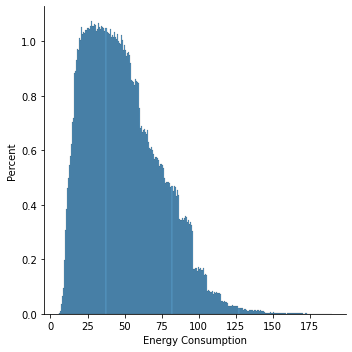

In [18]:
sns.displot(x="Energy Consumption", data=traffic_df, stat='percent')

There are dozens of other applicable plots and metrics () that you could use to better understand each of your variables. **Take 10 minutes** to play around with these on other variables to try and gain more insight, and check [the seaborn documentation](https://seaborn.pydata.org/tutorial/distributions.html#plotting-univariate-histograms) to see some of the other ways you can plot numerical variables.

In [19]:
#Use the following space to experiment. Add new cells below if you need to!



























## Step 4: Multivariate Analysis

Now that we have a foundation on what our variables look like in terms of frequency, distribution, averages, and other metrics, we can start to look at the relationships between different variables. Here we can really leverage the power of Matplotlib and Seaborn to visualize these relationships.

But before we go having our computer analyzing and visualizing relationships between millions of rows, it's important to realize that with each dimension of analysis, the number of computations will increase significantly. Hence, it may be wise to take a smaller sample of our data to run these analyses on. We can do this using `pd.DataFrame.sample()`

In [20]:
traffic_df_250k = traffic_df.sample(250000)

But be careful! We want to make sure our sample is still representative of the original dataset. This can be verified by comparing value counts, distributions, etc., or a representative sample can be engineered with clever manipulation of the `weights=` parameter in `pd.DataFrame.sample()`, however this is outside the scope of this workshop.

### Bivariate analysis

There are several ways we can compare two numeric variables. One of the most obvious is to plot each row with one variable as one axis and one as another. For example, if we want to analyze the relationship between Speed and Energy Consumption, we can use `sns.scatterplot()`:

<Axes: xlabel='Speed', ylabel='Energy Consumption'>

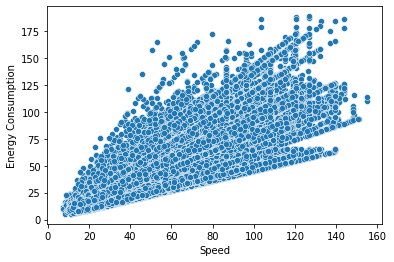

In [21]:
sns.scatterplot(data=traffic_df_250k, x="Speed", y="Energy Consumption")

Here we see a somewhat predictable trend between increased speed and increased energy consumption. However, it would be interesting to differentiate between vehicles (perhaps certian vehicles are more energy-effecient than others?). For this, we can add a third, categorical variable "Vehicle Type" to our plot using the `hue=` argument:

<Axes: xlabel='Speed', ylabel='Energy Consumption'>

C:\Users\basic\anaconda3\lib\site-packages\IPython\core\events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
C:\Users\basic\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


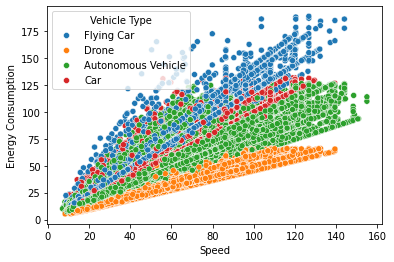

In [22]:
sns.scatterplot(data=traffic_df_250k, x="Speed", y="Energy Consumption", hue="Vehicle Type")

This would appear to suggest that drones are the most fuel efficient vehicles, although this may be due to overlapping of the dots. To test our hypothesis, we can make a new column for fuel efficiency (speed / fuel consumption) and box-plot it for the different vehicle types:

In [23]:
traffic_df["Fuel Efficiency"] = traffic_df["Speed"] / traffic_df["Energy Consumption"]

<Axes: xlabel='Vehicle Type', ylabel='Fuel Efficiency'>

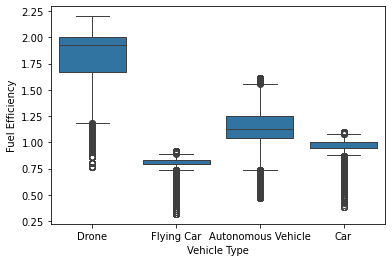

In [24]:
sns.boxplot(data=traffic_df, x="Vehicle Type", y="Fuel Efficiency")

Indeed, drones are the most fuel efficient vehicles on average, although the effect is less significant due to the presence of outliers in the data. This process of creating new variables from originals is called feature ranking, and can be performed both before analysis (in the case of more obviously useful features) as well as during analysis (when insights suggest a new feature may be useful).

Another useful bivariate analysis that can be used between two categorical variables is to examine the frequencies of their categories appearing in conjunction. For this, we can use `sns.histplot()`, specifying parameters `hue=` for our second categorical variable (the one we want the frequency of for each category of the first) and `shrink=` to make sure bars don't overlap:

<Axes: xlabel='City', ylabel='Count'>

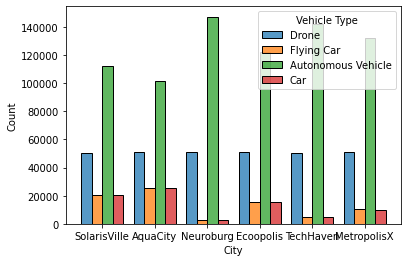

In [25]:
sns.histplot(data=traffic_df, x="City", hue="Vehicle Type", multiple="dodge", shrink=0.8)

This gives us a good idea of the distribution of different vehicle types accross our different cities.

Now it's your turn. **Take 5 minutes** to play around with these and any other charts you find on [Seaborn](https://seaborn.pydata.org/tutorial/relational.html) to try and see if you can derive and gain exidence for more insights/hypotheses between pairs of variables in the data. Be mindful of whether your variables are continuous, discrete, ordinal, or nominal!

In [26]:
#Use the following space to experiment. Add new cells below if you need to!



























### Tri+ Variate Analysis

While there's so much we can gain from looking at the relationships between two variables, we can often find even more insight in the relationships between three or more variables. To visualize the relationshop between three numeric variables, we can make a 3d scatterplot using Matplotlib. This will require us to make a `plt.figure` object and use `plt.figure.add_subplot()` to specify our axis, which can be set to `plt.scatter()` and specified for colors and lables as such:

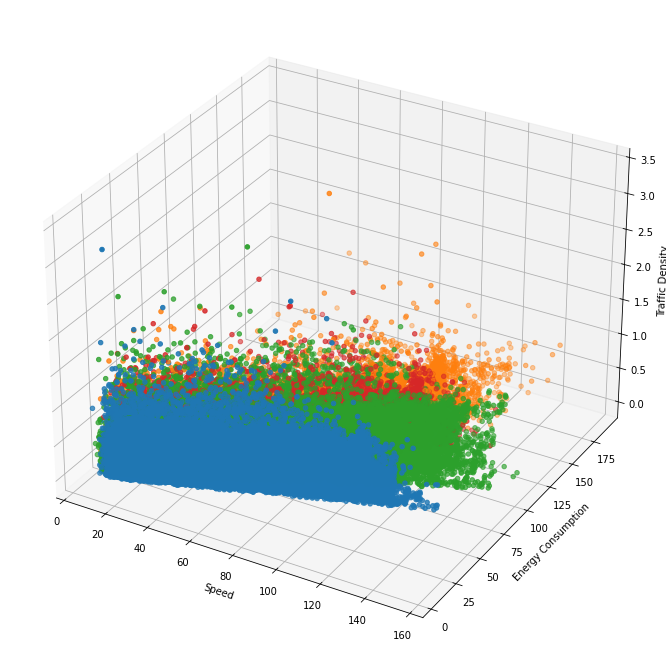

In [27]:
#Make our figure object and an axis for it, specifying a 3d projection
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')

#Specify a color map for our plot
colors = {'Drone':'tab:blue', 'Flying Car':'tab:orange', 'Autonomous Vehicle':'tab:green', 'Car':'tab:red'}
traffic_df_250k["Vehicle Colors"] = traffic_df_250k["Vehicle Type"]
traffic_df_250k["Vehicle Colors"] = traffic_df_250k["Vehicle Colors"].map(colors)

#Set the axis to a scatter plot with the following values and their colors
ax.scatter(traffic_df_250k["Speed"], traffic_df_250k["Energy Consumption"], traffic_df_250k["Traffic Density"], c=traffic_df_250k["Vehicle Colors"])

#Set our axis labels
ax.set_xlabel('Speed')
ax.set_ylabel('Energy Consumption')
ax.set_zlabel('Traffic Density')

#Show our plot
plt.show()

With this much data, its hard to visualize a relationshop between the three continuous variables. However, being continuous, we can easily calculate the pairwise correlation between them and other continuous variables with `pd.DataFrame.corr()` (specifying the `method="spearman"` correlation method to find linear correlations between continuous variables) and visualize them with `sns.heatmap()`:

<Axes: >

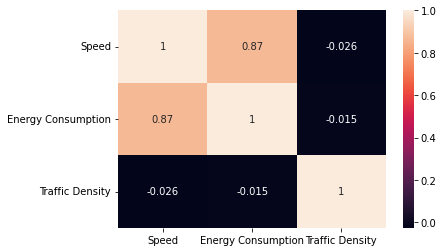

In [28]:
#Make a dataset that is a copy of our traffic_df_250k but with all non-float (non continuous) columns removed
continuous_traffic_df_250k = traffic_df_250k.select_dtypes(['float'])

corr = continuous_traffic_df_250k.corr(method='spearman')
sns.heatmap(corr, annot=True)

We see a strong positive linear correlation between speed and energy consumption, reaffirming our earlier findings. And with even larger datasets (think 100s of variables) of continuous variables, we can use heatmaps to easily detect potential relationships between pairs of variables without plotting them all pairwise. For discrete variables we can use other methods such as `method='pearson'` just the same, and experienced analysts can implement association tests such as Chi-Squared to pass into `pd.DataFrame.corr()` to get statistical associations between categorical varaibles.

## Step 5: Clustering (K-Means)

## Step 6: Prediction (Linear Regression and Random Forests)